In [5]:
# TODO
# :)

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

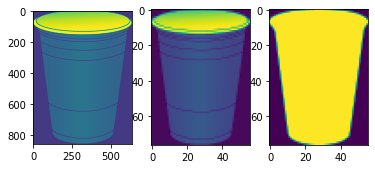

In [7]:
img = cv.imread('test_images/bob.jpg',0)
img2 = img.copy()


channels = cv.split(cv.imread('test_images/#cup.png', cv.IMREAD_UNCHANGED))
template1 = cv.cvtColor(cv.merge(channels[0:-1]), cv.COLOR_BGR2GRAY)
mask1 = channels[-1]

w, h = template1.shape[::-1]
p = 0.09; rez = (int(p*w), int(p*h))
template = cv.resize(template1, rez, interpolation = cv.INTER_AREA)
mask = cv.resize(mask1, rez, interpolation = cv.INTER_AREA)
w, h = template.shape[::-1]

plt.subplot(1,3,1); plt.imshow(template1)
plt.subplot(1,3,2); plt.imshow(template)
plt.subplot(1,3,3); plt.imshow(mask)

In [58]:
def find(img2, template, th=0.11):
    # All the 6 methods for comparison in a list
    methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
                'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

    for meth in methods:
        img = img2.copy()
        method = eval(meth)
        # Apply template Matching
        res = cv.matchTemplate(img,template,method,mask=mask)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        img3 = cv.merge((img,img,img))
        
        if meth == 'cv.TM_SQDIFF_NORMED':
            threshold = th
            loc = np.where( res <= threshold )
            for pt in zip(*loc[::-1]):
                cv.rectangle(img3, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
        
        cv.rectangle(img3,top_left, bottom_right, (255,0,0), 2)
        
        plt.figure(figsize=(15,5))
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(img3,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)
        plt.show()

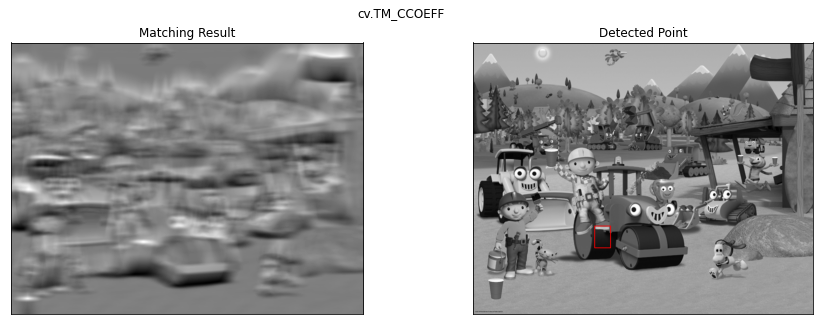

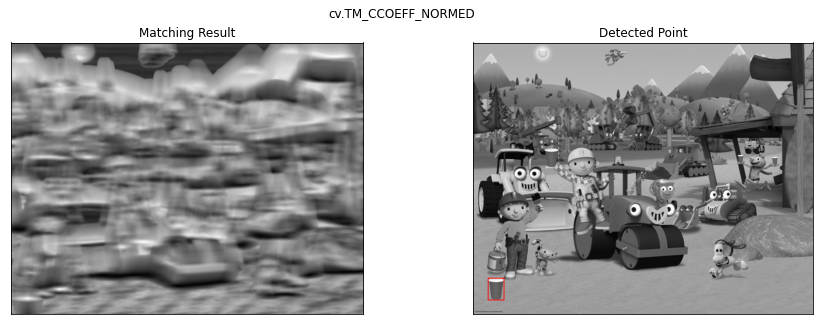

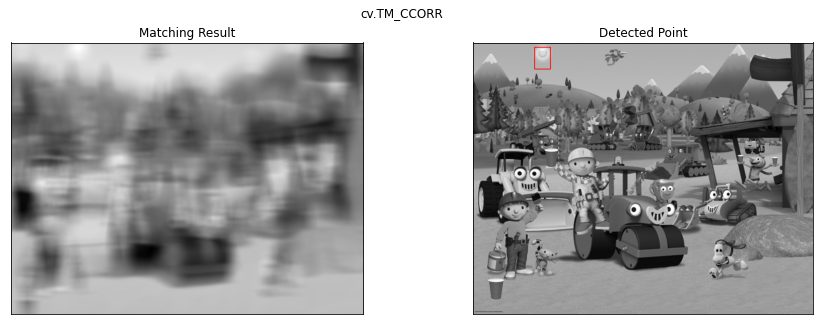

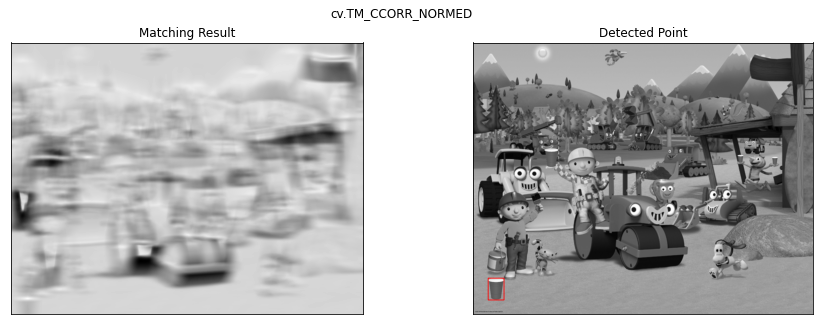

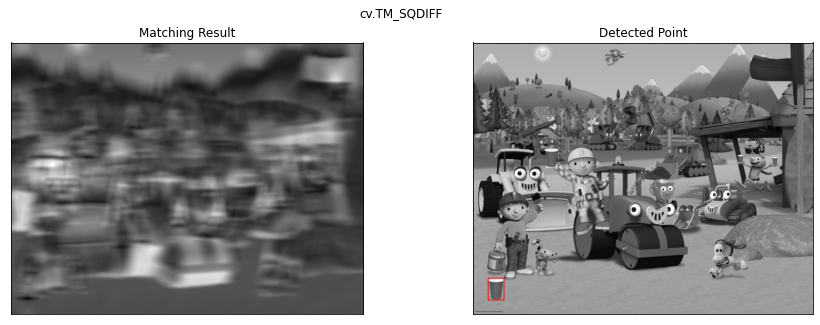

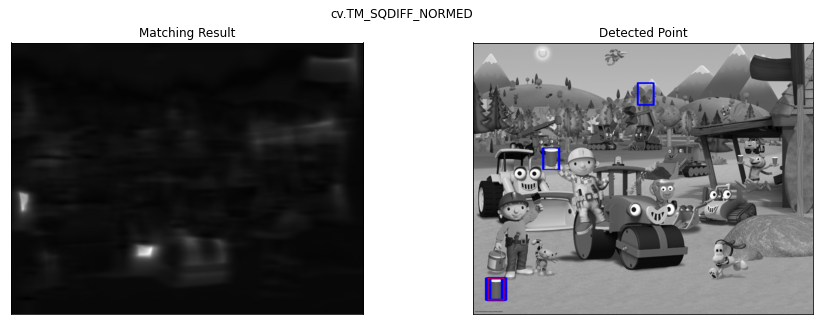

In [66]:
find(img2,template)

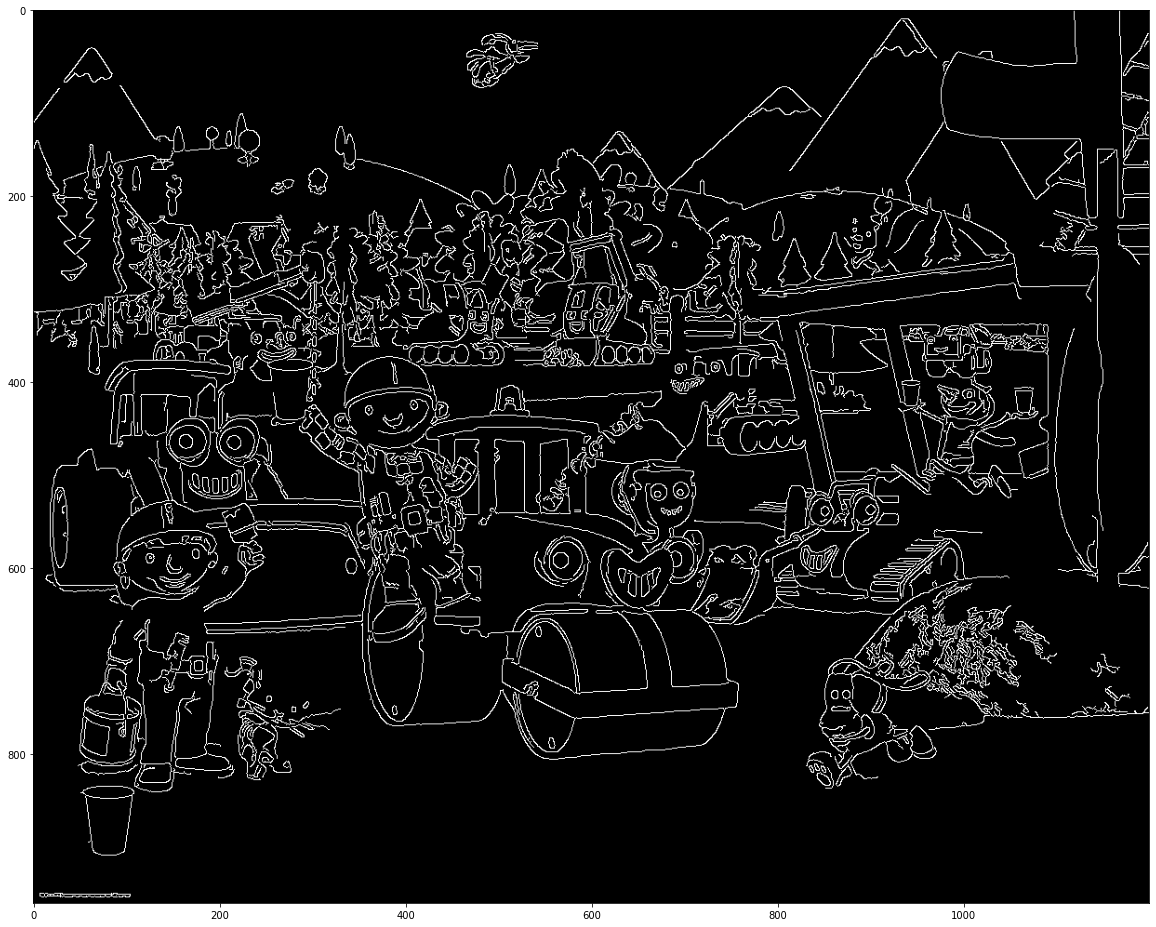

In [114]:
# Canny Edge Detection
edges = cv.Canny(image=img, threshold1=40, threshold2=170) 
 
# Display Canny Edge Detection Image
plt.figure(figsize=(20,20))
plt.imshow(edges,cmap = 'gray')

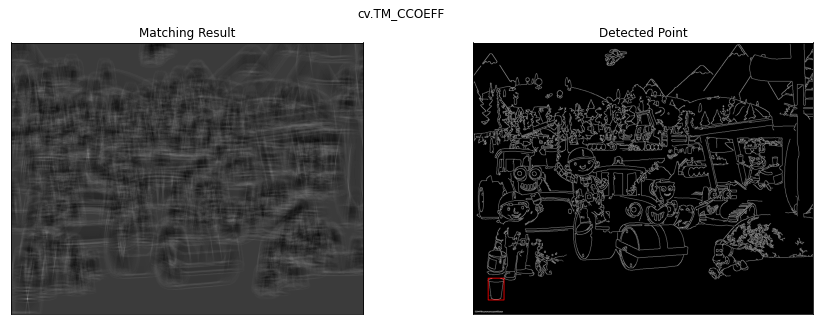

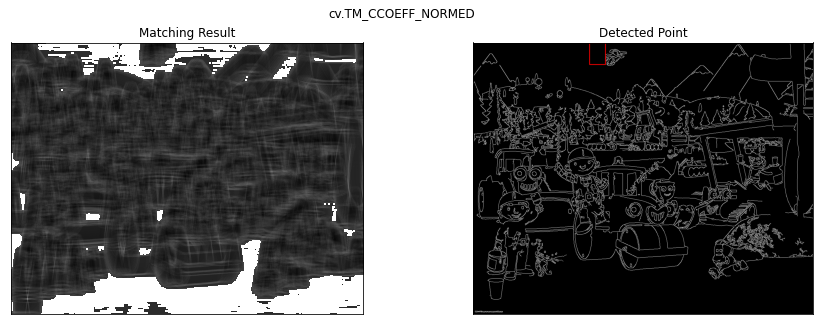

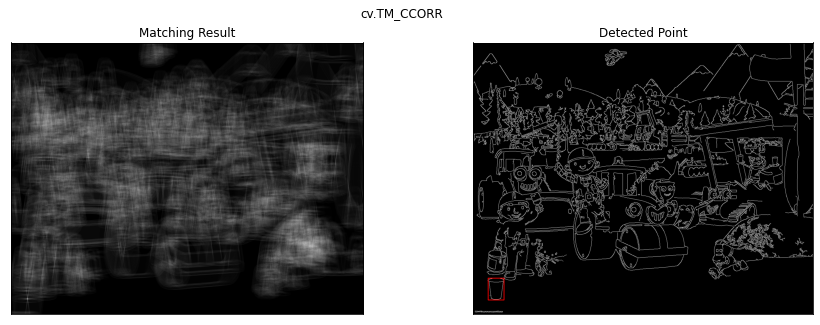

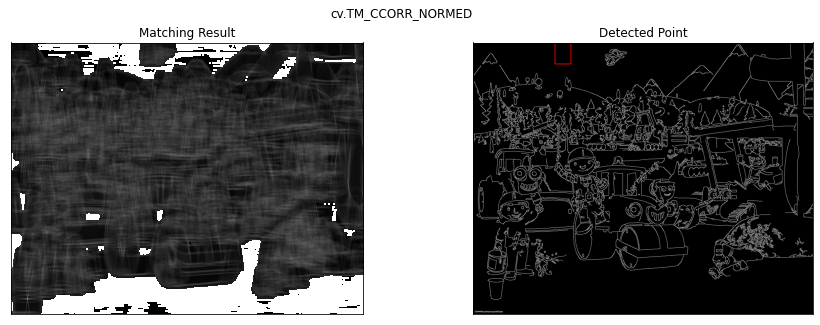

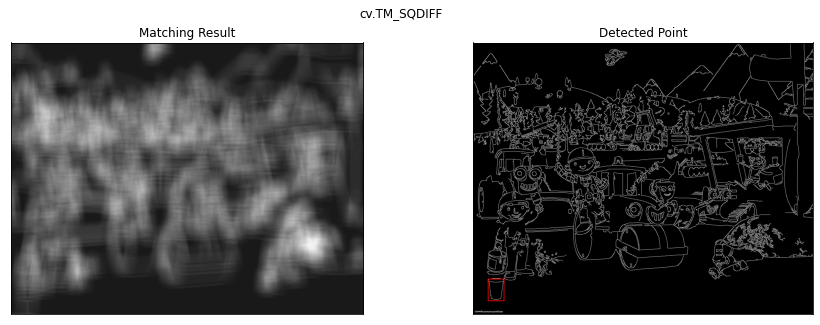

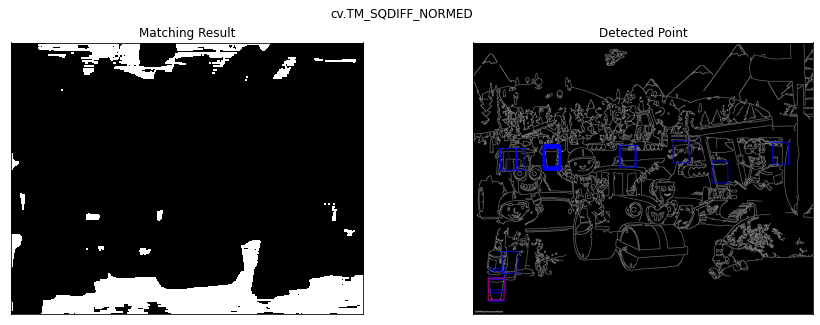

In [115]:
Cimg = cv.Canny(image=img2, threshold1=40, threshold2=170)
Ctemp = cv.Canny(image=template, threshold1=40, threshold2=170)


find(Cimg, Ctemp, th=1.5)